In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as datetime
import sys
from normalize_data import getNormalizedDataset
df = getNormalizedDataset()
df['mes'] = df['fecha'].dt.month
df['año'] = df['fecha'].dt.year


Text(0.5, 1.0, 'Cantidad de publicaciones según el año \n')

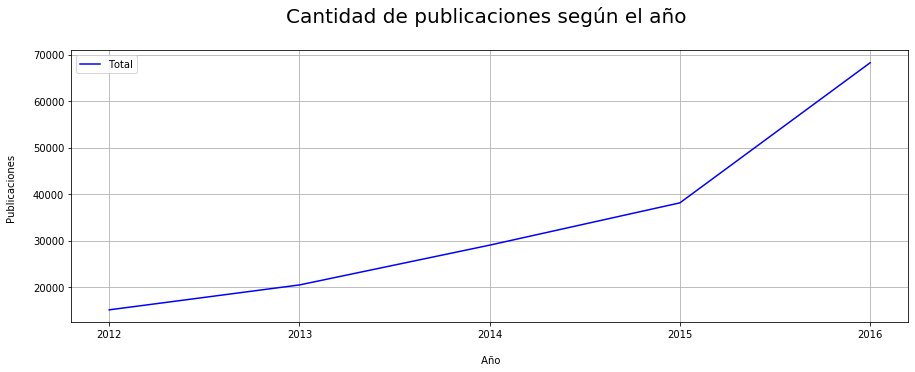

In [9]:
# Veamos el comportamiento a nivel general de ZonaProp en Mexico
zpropMexico = df.groupby(['año']).size()
zpropMexico = zpropMexico.reset_index()
zpropMexico.rename(columns={0:'Publicaciones'}, inplace=True)
total = ((zpropMexico.sum()).values)[1]

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(zpropMexico['año'], zpropMexico['Publicaciones'], label='Total', color='blue')

plt.xticks([2012,2013,2014,2015,2016])
plt.grid(b=True, which='major', axis='both')
ax.set_xlabel("\n Año")
ax.set_ylabel("Publicaciones \n")
ax.legend(loc='best')    
ax.set_title('Cantidad de publicaciones según el año \n', fontdict={'fontsize':20})

Text(0.5, 1.0, 'Crecimiento porcentual según sub-período \n')

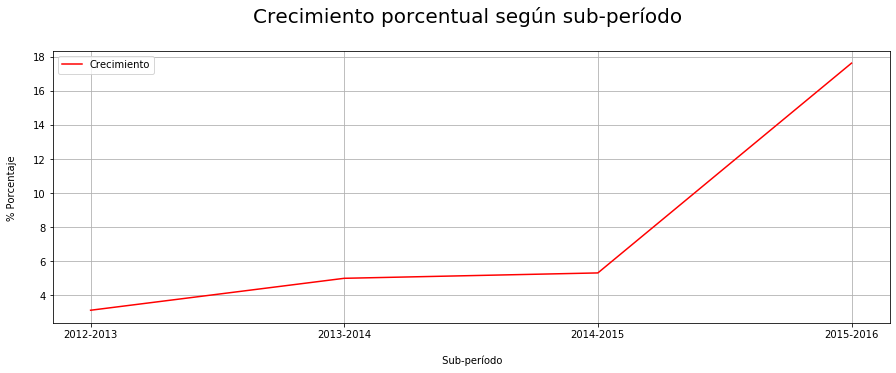

In [10]:

## Analisis de variacion entre periodos

nDf = zpropMexico.set_index('año')
dfVariacion = pd.DataFrame(columns=['period', 'variation'])
dfVariacion = dfVariacion.append({ "period": '2012-2013', "variation": (nDf.loc[2013].Publicaciones - nDf.loc[2012].Publicaciones) * 100 / total}, ignore_index=True)
dfVariacion = dfVariacion.append({ "period": '2013-2014', "variation": (nDf.loc[2014].Publicaciones - nDf.loc[2013].Publicaciones) * 100 / total}, ignore_index=True)
dfVariacion = dfVariacion.append({ "period": '2014-2015', "variation": (nDf.loc[2015].Publicaciones - nDf.loc[2014].Publicaciones) * 100 / total}, ignore_index=True)
dfVariacion = dfVariacion.append({ "period": '2015-2016', "variation": (nDf.loc[2016].Publicaciones - nDf.loc[2015].Publicaciones) * 100 / total}, ignore_index=True)

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(dfVariacion['period'], dfVariacion['variation'], label='Crecimiento', color='red')

plt.grid(b=True, which='major', axis='both')
ax.set_xlabel("\n Sub-período")
ax.set_ylabel("% Porcentaje \n")
ax.legend(loc='best')    
ax.set_title('Crecimiento porcentual según sub-período \n', fontdict={'fontsize':20})


In [13]:
# Hipotesis:
# En que ciudades vario mas las cantidades de publicaciones durante los 5 años?.
# Armar una tabla tipo pivot de: provincias vs años, y en el valor pongo la cantidad de publicaciones

data = df.groupby(['provincia','año']).size()
data = data.reset_index()
data.rename(columns={0:'count'}, inplace=True)
data = data.pivot(index='provincia', columns='año', values='count')
data = data.reset_index()
data.columns = ['provincia',2012,2013,2014,2015,2016]
data['total'] = data[2012]+data[2013]+data[2014]+data[2015]+data[2016]
data['variacion_total'] = (data[2016]-data[2012])/data['total']
data['variacion_2012-2013'] = (data[2013]-data[2012])/data['total']
data['variacion_2013-2014'] = (data[2014]-data[2013])/data['total']
data['variacion_2014-2015'] = (data[2015]-data[2014])/data['total']
data['variacion_2015-2016'] = (data[2016]-data[2015])/data['total']
data.head()
#data.max()
# data.iloc[data['variacion_2012-2013'].idxmax(),:]
# Vemos que hay publicaciones

,provincia,2012,2013,2014,2015,2016,total,variacion_total,variacion_2012-2013,variacion_2013-2014,variacion_2014-2015,variacion_2015-2016
0,Aguascalientes,154,312,301,245,500,1512,0.23,0.10,-0.01,-0.04,0.17
1,Baja California Norte,267,352,712,811,761,2903,0.17,0.03,0.12,0.03,-0.02
2,Baja California Sur,196,911,63,134,166,1470,-0.02,0.49,-0.58,0.05,0.02
3,Campeche,34,63,14,13,45,169,0.07,0.17,-0.29,-0.01,0.19
4,Chiapas,126,150,164,94,361,895,0.26,0.03,0.02,-0.08,0.30


Text(0.5, 1.0, 'Crecimiento de cantidad de publicaciones por provincia \n')

<Figure size 2160x1440 with 0 Axes>

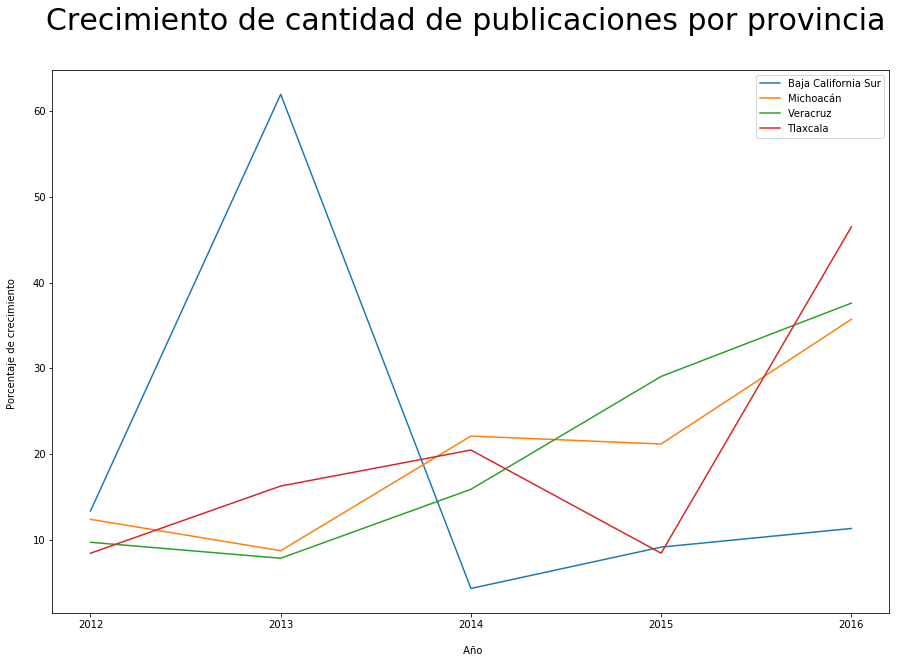

In [12]:
# Que provincias presentaron mayor crecimiento en cuanto a cantidad de publicaciones año a año?
# Esta informacion puede servir ya que se puede ver donde va creciendo y teniendo mas lugares para vivir cierta zona


d1 = data['variacion_2012-2013'].idxmax()
d2 = data['variacion_2013-2014'].idxmax()
d3 = data['variacion_2014-2015'].idxmax()
d4 = data['variacion_2015-2016'].idxmax()

# Pasar a valores relativos porcentuales.
d = data.loc[[d1, d2, d3, d4], : ]
d[2012] = d[2012]/d['total']*100
d[2013] = d[2013]/d['total']*100
d[2014] = d[2014]/d['total']*100
d[2015] = d[2015]/d['total']*100
d[2016] = d[2016]/d['total']*100

plt.figure(figsize=(30,20))
fig, ax = plt.subplots(figsize=(15,10))

for index, row in d.iterrows():
    row = d.loc[[index], :]
    label = row['provincia'].tolist()[0]
    total = row.total
    row = row.loc[:, [2012,2013,2014,2015,2016]].melt()
    año = row.variable
    valor = row.value
    ax.plot(año, valor, label=label)
    

plt.xticks([2012,2013,2014,2015,2016])
#plt.yticks([0,10,20,30,40,50,60,70,80,90,100])
ax.set_xlabel("\n Año")
ax.set_ylabel("Porcentaje de crecimiento \n")
ax.legend(loc='best')    
ax.set_title('Crecimiento de cantidad de publicaciones por provincia \n', fontdict={'fontsize':30})
    


Text(0.5, 1.0, 'Derecimiento de cantidad de publicaciones por provincia \n')

<Figure size 2160x1440 with 0 Axes>

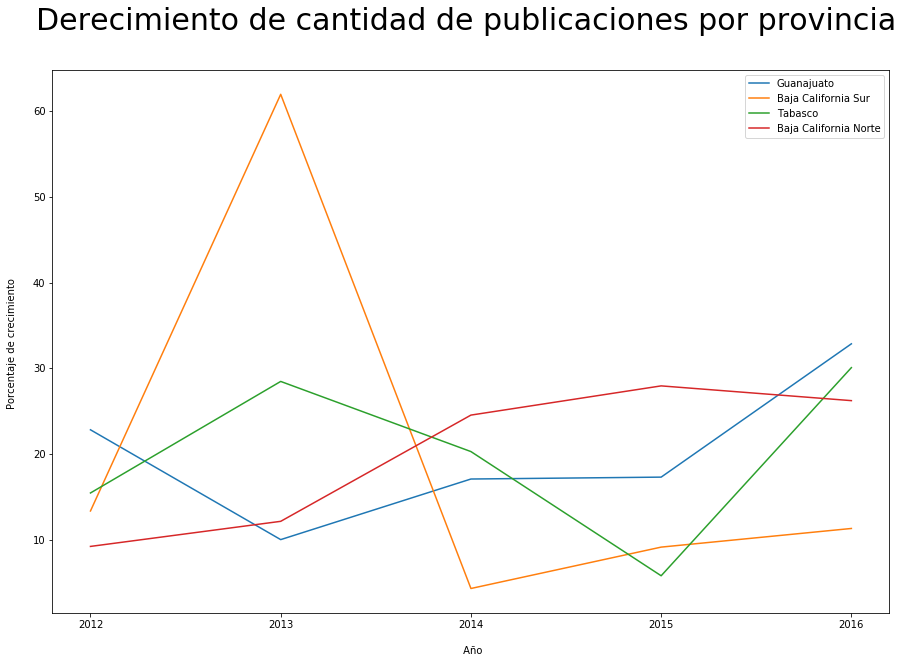

In [14]:
# Que provincias presentaron mayor decrecimiento en cuanto a cantidad de publicaciones año a año?
# Esta informacion puede servir ya que se puede ver donde va creciendo y teniendo mas lugares para vivir cierta zona

d1 = data['variacion_2012-2013'].idxmin()
d2 = data['variacion_2013-2014'].idxmin()
d3 = data['variacion_2014-2015'].idxmin()
d4 = data['variacion_2015-2016'].idxmin()

# Pasar a valores relativos porcentuales.
d = data.loc[[d1, d2, d3, d4], : ]
d[2012] = d[2012]/d['total']*100
d[2013] = d[2013]/d['total']*100
d[2014] = d[2014]/d['total']*100
d[2015] = d[2015]/d['total']*100
d[2016] = d[2016]/d['total']*100

plt.figure(figsize=(30,20))
fig, ax = plt.subplots(figsize=(15,10))

for index, row in d.iterrows():
    row = d.loc[[index], :]
    label = row['provincia'].tolist()[0]
    total = row.total
    row = row.loc[:, [2012,2013,2014,2015,2016]].melt()
    año = row.variable
    valor = row.value
    ax.plot(año, valor, label=label)
    

plt.xticks([2012,2013,2014,2015,2016])
#plt.yticks([0,10,20,30,40,50,60,70,80,90,100])
ax.set_xlabel("\n Año")
ax.set_ylabel("Porcentaje de crecimiento \n")
ax.legend(loc='best')    
ax.set_title('Derecimiento de cantidad de publicaciones por provincia \n', fontdict={'fontsize':30})
    


   index  value
0   2012  11.74
1   2013  18.10
2   2014  16.29
3   2015  17.44
4   2016  36.43


index,newIndex,2012,2013,2014,2015,2016,total,variacion_2012-2013,variacion_2013-2014,variacion_2014-2015,variacion_2015-2016,variacion_total
0,1,11.74,18.10,16.29,17.44,36.43,5342.84,0.06,-0.02,0.01,0.19,0.25


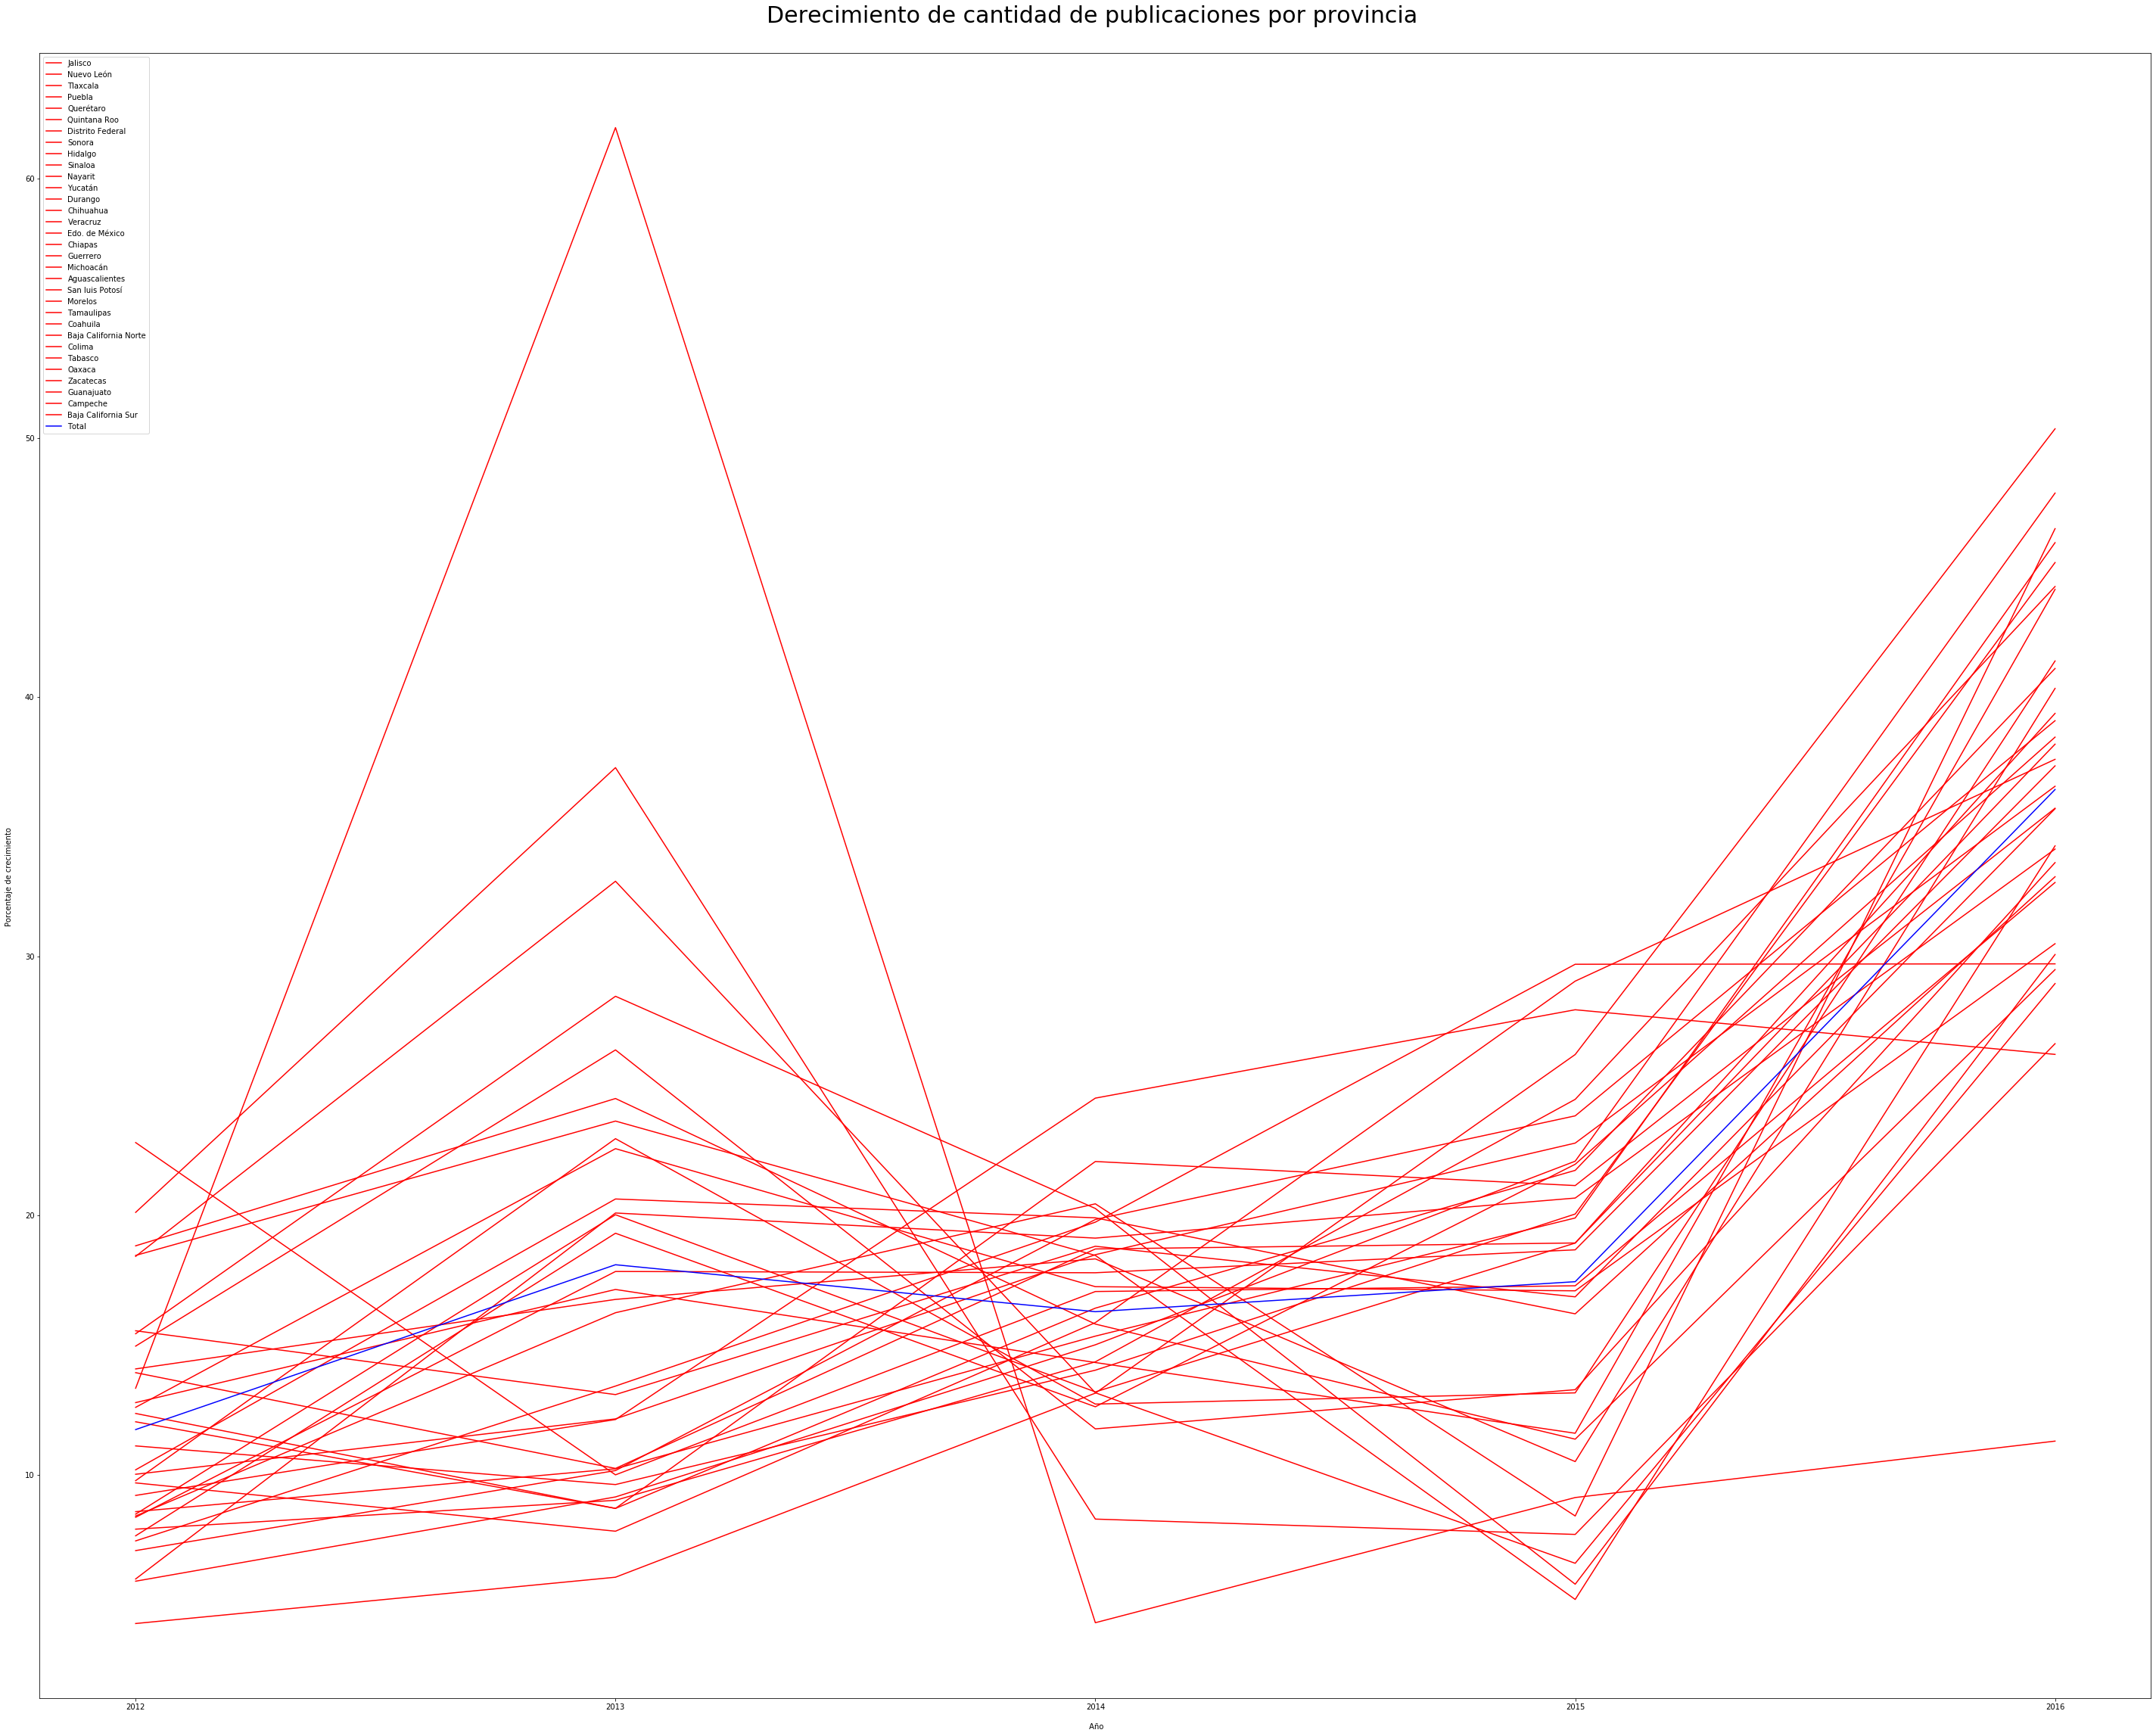

In [15]:
# Que provincias presentaron mayor decrecimiento en cuanto a cantidad de publicaciones año a año?
# Esta informacion puede servir ya que se puede ver donde va creciendo y teniendo mas lugares para vivir cierta zona

data = df.groupby(['provincia','año']).size()
data = data.reset_index()
data.rename(columns={0:'count'}, inplace=True)
data = data.pivot(index='provincia', columns='año', values='count')
data = data.reset_index()
data.columns = ['provincia',2012,2013,2014,2015,2016]
data['total'] = data[2012]+data[2013]+data[2014]+data[2015]+data[2016]
data['variacion_total'] = (data[2016]-data[2012])/data['total']
data['variacion_2012-2013'] = (data[2013]-data[2012])/data['total']
data['variacion_2013-2014'] = (data[2014]-data[2013])/data['total']
data['variacion_2014-2015'] = (data[2015]-data[2014])/data['total']
data['variacion_2015-2016'] = (data[2016]-data[2015])/data['total']
d = data.sort_values(by='variacion_total', ascending=False)

d[2012] = d[2012]/d['total']*100
d[2013] = d[2013]/d['total']*100
d[2014] = d[2014]/d['total']*100
d[2015] = d[2015]/d['total']*100
d[2016] = d[2016]/d['total']*100


fig, ax = plt.subplots(figsize=(50,40))

for index, row in d.iterrows():
    row = d.loc[[index], :]
    label = row['provincia'].tolist()[0]
    total = row.total
    row = row.loc[:, [2012,2013,2014,2015,2016]].melt()
    año = row.variable
    valor = row.value
    ax.plot(año, valor, label=label, color='r')
    
newDf = d.mean().reset_index()
newDf['newIndex'] = 1
newDf = newDf.pivot(columns='index', index="newIndex", values=0).reset_index()
for index, row in newDf.iterrows():

    row = newDf.loc[[index], :]
    label = 'Total'
    total = row.total
    row = row.loc[:, [2012,2013,2014,2015,2016]].melt()
    print(row)
    año = row['index']
    valor = row.value
    ax.plot(año, valor, label=label, color='blue')
    
plt.xticks([2012,2013,2014,2015,2016])
#plt.yticks([0,10,20,30,40,50,60,70,80,90,100])
ax.set_xlabel("\n Año")
ax.set_ylabel("Porcentaje de crecimiento \n")
ax.legend(loc='best')    
ax.set_title('Derecimiento de cantidad de publicaciones por provincia \n', fontdict={'fontsize':30})

newDf